In [1]:
from KGS import *
from TASDataObject_v2 import *

# Article plots

## Suseptibility plots

In [2]:
Ag_sus = pd.read_csv('SQUID_Uterecht_data/20240222_NCCO_AG.dat', header=20, na_values=[''])
UBC_sus = pd.read_csv('SQUID_Uterecht_data/20240223_NCCO_SC_Canada4_full_size.dat', header=20, na_values=[''])
KU_sus = pd.read_csv('SQUID_Uterecht_data/20240226_NCCO_P_Copenhagen_annealed.dat', header=20, na_values=[''])

print(UBC_sus)

             Time  Comment  Field (Oe)  Temperature (K)  Long Moment (emu)  \
0    1.708724e+09      NaN        10.0         1.800814          -0.211449   
1    1.708724e+09      NaN        10.0         2.343911          -0.211476   
2    1.708724e+09      NaN        10.0         2.847054          -0.211488   
3    1.708724e+09      NaN        10.0         3.168666          -0.211482   
4    1.708724e+09      NaN        10.0         3.758556          -0.211477   
..            ...      ...         ...              ...                ...   
189  1.708770e+09      NaN        10.0        47.993290           0.001147   
190  1.708770e+09      NaN        10.0        48.502520           0.001138   
191  1.708770e+09      NaN        10.0        48.998110           0.001131   
192  1.708770e+09      NaN        10.0        49.503940           0.001123   
193  1.708770e+09      NaN        10.0        50.006730           0.001116   

     Long Scan Std Dev  Long Algorithm  Long Reg Fit  Long Perc

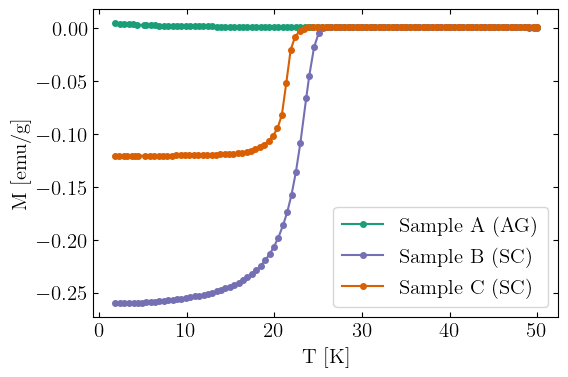

In [3]:
plt.figure(figsize=(6, 4))

plt.plot(Ag_sus['Temperature (K)'].iloc[: len(Ag_sus) // 2], Ag_sus['Long Moment (emu)'].iloc[: len(Ag_sus) // 2]/ 2.5718, label='Sample A (AG)', marker='o')
plt.plot(KU_sus['Temperature (K)'].iloc[: len(KU_sus) // 2], KU_sus['Long Moment (emu)'].iloc[: len(KU_sus) // 2]/0.0337, label='Sample B (SC)',marker='o')
plt.plot(UBC_sus['Temperature (K)'].iloc[: len(UBC_sus) // 2], UBC_sus['Long Moment (emu)'].iloc[: len(UBC_sus) // 2]/1.7521, label='Sample C (SC)',marker='o')
plt.xlabel('T [K]')
plt.ylabel('M [emu/g]')
plt.legend()



# Phonon fits for both sampels

## $\int \tilde{I}_{pho} d\mathbf{q}$

In [4]:
# Functions

def A_N_gauss(x, A_tot, f1, mu1, sigma1, mu2, sigma2,b):
    return A_tot*(f1*(1)/(np.sqrt(2*np.pi*sigma1**2))* np.exp(-(x-mu1)** 2 / (2*sigma1**2))+(1-f1)* (1)/(np.sqrt(2*np.pi*sigma2**2)) *np.exp(-(x-mu2)** 2 / (2*sigma2**2)))+b

In [5]:
# SC phonon
sc_phonon = np.genfromtxt('./Data/038367', skip_header = 63)

qk_sc_phonon = sc_phonon[:,2]
I_sc_phonon = sc_phonon[:,8]/20e6
err_sc_phonon = np.sqrt(sc_phonon[:,8])/20e6

params = {'A_tot': 0.1, 'f1': 0.5 ,'mu1':-0.1, 'sigma1':0.05, 
          'mu2': 0.05, 'sigma2':27.50e-3, 'b':0.00005}

limits = {'mu1': (-0.1, -0.07), 'sigma1':(0,0.2),'mu2':(0.03,0.1),'sigma2':(0,0.5), 'b':(0,None)}

gaussN_fit = fit(qk_sc_phonon, I_sc_phonon, err_sc_phonon, A_N_gauss, params, limits=limits)
gaussN_fit.hesse()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 388.9                      │             Nfcn = 1239              │
│ EDM = 3.55e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A_tot  │ 24.77e-6  │  0.17e-6  │            │            │         │         │       │
│ 1 │ f1     │  0.5290   │  0.0034   │            │            │         │         │       │
│ 2 │ mu1    │ -70.00e-3 │  0.04e-3  │            │            │  -0.1   │  -0.07  │       │
│ 3 │ sigma1 │  45.7e-3  │  0.5e-3   │            │            │    0    │   0.2   │       │
│ 4 │ mu2    │ 47.45e-3  │  0.27e-3  │            │            │  0.03   │   0.1   │       │
│ 5 │ sigma2 │ 27.50e-3  │  0.24e-3  │            │            │    0    │   0.5   │       │
│ 6 │ b      │  7.1e-6   │  0.4e-6   │            │            │    0    │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬───────────────────────────────────────────────────────────────────────┐
│        │     A_tot        f1       mu1    sigma1       mu2    sigma2         b │
├────────┼───────────────────────────────────────────────────────────────────────┤
│  A_tot │  2.74e-14  8.55e-11  5.67e-19  2.08e-11  7.53e-12  1.08e-11 -4.42e-14 │
│     f1 │  8.55e-11  1.16e-05 -1.11e-13  9.17e-07  4.18e-07 -2.81e-07 -1.26e-10 │
│    mu1 │  5.67e-19 -1.11e-13  1.05e-13 -1.17e-14 -8.28e-15  6.86e-15    -3e-18 │
│ sigma1 │  2.08e-11  9.17e-07 -1.17e-14  2.06e-07  5.23e-08 -2.05e-08 -3.79e-11 │
│    mu2 │  7.53e-12  4.18e-07 -8.28e-15  5.23e-08  7.47e-08 -2.55e-08 -1.62e-11 │
│ sigma2 │  1.08e-11 -2.81e-07  6.86e-15 -2.05e-08 -2.55e-08  5.61e-08 -3.77e-11 │
│      b │ -4.42e-14 -1.26e-10    -3e-18 -3.79e-11 -1.62e-11 -3.77e-11  1.47e-13 │
└────────┴───────────────────────────────────────────────────────────────────────┘

In [6]:
# AG phonon
ag_phonon = np.genfromtxt('./Data/038498', skip_header = 63)
qk_ag_phonon = ag_phonon[:,2]
I_ag_phonon = ag_phonon[:,8]/20e6
err_ag_phonon = np.sqrt(ag_phonon[:,8])/20e6

params_ag = {'A_tot': 0.1, 'f1': 0.5 ,'mu1':-0.1, 'sigma1':0.05, 
          'mu2': 0.05, 'sigma2':27.50e-3, 'b':0.00001}

limits_ag = {'mu1': (-0.1, -0.03), 'sigma1':(0,0.1),'mu2':(0.03,0.1),'sigma2':(0,0.5)}

fixed_ag = {'b':0.0001}

gaussN_fit_ag = fit(qk_ag_phonon, I_ag_phonon, err_ag_phonon, A_N_gauss, params_ag, limits=limits_ag)
gaussN_fit_ag.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 359.5                      │             Nfcn = 1091              │
│ EDM = 1.49e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A_tot  │  73.5e-6  │  0.5e-6   │            │            │         │         │       │
│ 1 │ f1     │   0.500   │   0.005   │            │            │         │         │       │
│ 2 │ mu1    │ -49.7e-3  │  0.6e-3   │            │            │  -0.1   │  -0.03  │       │
│ 3 │ sigma1 │  43.6e-3  │  0.5e-3   │            │            │    0    │   0.1   │       │
│ 4 │ mu2    │  54.8e-3  │  0.4e-3   │            │            │  0.03   │   0.1   │       │
│ 5 │ sigma2 │ 33.50e-3  │  0.32e-3  │            │            │    0    │   0.5   │       │
│ 6 │ b      │  65.3e-6  │  1.5e-6   │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬───────────────────────────────────────────────────────────────────────┐
│        │     A_tot        f1       mu1    sigma1       mu2    sigma2         b │
├────────┼───────────────────────────────────────────────────────────────────────┤
│  A_tot │  2.48e-13  8.52e-11 -6.32e-11  7.58e-11  2.51e-11  7.06e-11 -6.59e-13 │
│     f1 │  8.52e-11  2.71e-05   2.8e-06  2.02e-06  1.82e-06 -1.16e-06 -1.31e-10 │
│    mu1 │ -6.32e-11   2.8e-06  3.88e-07     2e-07  2.01e-07 -1.51e-07   2.1e-10 │
│ sigma1 │  7.58e-11  2.02e-06     2e-07  2.18e-07  1.46e-07  -5.9e-08 -2.21e-10 │
│    mu2 │  2.51e-11  1.82e-06  2.01e-07  1.46e-07  1.63e-07 -7.98e-08 -6.97e-11 │
│ sigma2 │  7.06e-11 -1.16e-06 -1.51e-07  -5.9e-08 -7.98e-08  9.98e-08 -2.25e-10 │
│      b │ -6.59e-13 -1.31e-10   2.1e-10 -2.21e-10 -6.97e-11 -2.25e-10  2.17e-12 │
└────────┴───────────────────────────────────────────────────────────────────────┘

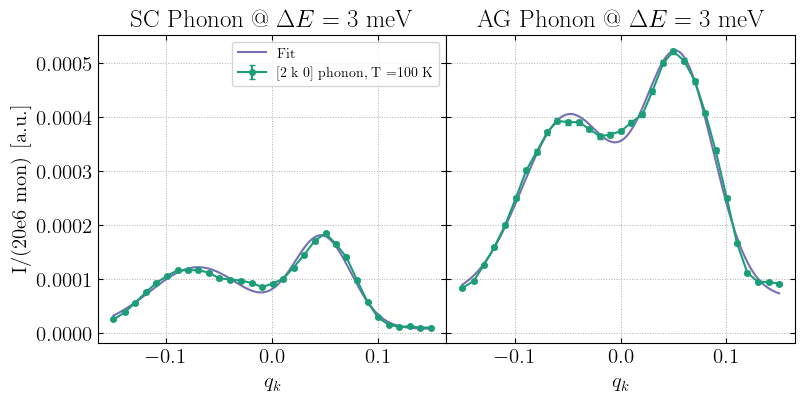

In [7]:
qk_range = np.linspace(min(qk_sc_phonon), max(qk_sc_phonon), 1000)

phonon_area_sc = gaussN_fit.values[0]
phonon_area_ag = gaussN_fit_ag.values[0]

fig, ax = plt.subplots(1,2, figsize=(9,4), sharey=True)

ax[0].errorbar(qk_sc_phonon, I_sc_phonon, err_sc_phonon, fmt='o-', label='[2 k 0] phonon, T =100 K')
ax[0].plot(qk_range, A_N_gauss(qk_range, *gaussN_fit.values), label='Fit')
ax[0].set_ylabel('I/(20e6 mon) [a.u.]')
ax[0].set_xlabel(r'$q_k$')
ax[0].set_title(r'SC Phonon @ $\Delta E = 3$ meV')
ax[0].legend(fontsize=10)

ax[1].errorbar(qk_ag_phonon, I_ag_phonon, err_ag_phonon, fmt='o-', label='2 k 0 phonon, T =100 K')
ax[1].plot(qk_range, A_N_gauss(qk_range, *gaussN_fit_ag.values), label='Fit')
#ax[1].set_ylabel('I/mon [a.u.]')
ax[1].set_xlabel(r'$q_k$')
ax[1].set_title(r'AG Phonon @ $\Delta E = 3$ meV')

plt.subplots_adjust(wspace=0)
ax[0].grid(True, which='both', linestyle=':', linewidth=0.7)
ax[1].grid(True, which='both', linestyle=':', linewidth=0.7)
#plt.tight_layout()

## $f(\mathbf{Q})$

In [8]:
# for Q 
Q_magnetic = np.sqrt(0.5**2+0.5**2)

def f_q(Q, A, a, B, b, C, c, D):
    partA = A * np.exp(-a*((Q)/(4*np.pi))**2)
    partB = B * np.exp(-b*((Q)/(4*np.pi))**2)
    partC = C * np.exp(-c*((Q)/(4*np.pi))**2)
    return partA + partB + partC + D
                    # Nd3+                                                                          Cu2+
fq_NCCO = 0.935 * f_q(Q_magnetic, 0.0540, 25.0293, 0.3101, 12.1020, 0.6575, 4.7223, -0.0216) + (1-0.935)*f_q(Q_magnetic, 0.0232, 34.9686, 0.4023, 11.5640, 0.5882, 3.8428, -0.0137) 

print(fq_NCCO)
#f_q = 0.935 * (0.054 * np.exp(-25.0293 * (1 / (2 * np.pi)**2)) + 0.3101 * np.exp(-12.1020 * (1 / (2 * np.pi)**2)) + 0.6575 * np.exp(-4.7223 * (1 / (2 * np.pi)**2)) - 0.0216) + 0.0232 * np.exp(-34.9686 * (1 / (2 * np.pi)**2)) + 0.4023 * np.exp(-11.5640 * (1 / (2 * np.pi)**2)) + 0.5882 * np.exp(-3.8428 * (1 / (2 * np.pi)**2)) - 0.0137 


0.9745688873795465


## $F_N(\mathbf{Q})$

In [9]:
F_N_200 = 89.7943 # [barns] From VESTA: from kf=2.661 and is the same for ki=2.921

## $m/M$

In [10]:
neutron_au_mass = 1.009

Nd_au_mass = 144.243 # 4 Nd atoms - 15% Ce
Ce_au_mass = 140.116 # 15 % Ce atoms
Cu_au_mass = 63.546 # 2 Cu atoms
O_au_mass = 15.999 # 8 O atoms

M = 2*((2-0.15)*Nd_au_mass+0.15*Ce_au_mass+Cu_au_mass+4*O_au_mass)

mM = neutron_au_mass/M
print(mM)

0.0012144658895770059


## $(\hbar \mathbf{Q})^2/2m$

In [11]:
# Both phonons measured at 2 0 0 for DeltaE = 3 meV

################# SC Phonon ####################
b1_sc_phonon = gaussN_fit.values[2]
b2_sc_phonon = gaussN_fit.values[4]

avg_sc_branch = (b2_sc_phonon-b1_sc_phonon)/2
print('avg_branch_length (SC) =', avg_sc_branch)

Q_sc = np.sqrt((2*2*np.pi/3.957)**2 + (avg_sc_branch*2*np.pi/3.957)**2)*10**(10) # [m^(-1)]

hbarQ_2m_sc = 1.054*10**(-34)*5.682*10**(-13)*(Q_sc**2)/(2*1.67*10**(-27)) # [meV]
print('SC_hbar =',hbarQ_2m_sc)

avg_branch_length (SC) = 0.05872634891267718
SC_hbar = 18.09911279521099


In [12]:
################# AG Phonon ####################

b1_ag_phonon = gaussN_fit_ag.values[2]
b2_ag_phonon = gaussN_fit_ag.values[4]

avg_ag_branch = (b2_ag_phonon-b1_ag_phonon)/2
print('avg_branch_length (AG) =',avg_ag_branch)

Q_ag = np.sqrt((2*2*np.pi/3.957)**2 + (avg_ag_branch*2*np.pi/3.957)**2)*10**(10)

hbarQ_2m_ag = 1.054*10**(-34)*5.682*10**(-13)*(Q_ag**2)/(2*1.67*10**(-27)) # [meV]

print('AG_hbar =',hbarQ_2m_ag)

avg_branch_length (AG) = 0.052255478104711185
AG_hbar = 18.09586612924217


## $d\omega / dq$

In [13]:
q_avg_sc_branch = (b2_sc_phonon + b1_sc_phonon)/2
q_avg_ag_branch = (b2_ag_phonon+b1_ag_phonon)/2

#print('zone center phonon AG = ', q_avg_ag_branch)
#print('zone center phonon SC = ',q_avg_sc_branch)

print('avg branch distance AG = ', avg_ag_branch)
print('avg branch distance SC = ', avg_sc_branch)

dw_dq_sc = abs(3/avg_sc_branch) #[meV/r.l.u.]
dw_dq_ag = abs(3/avg_ag_branch) #[meV/r.l.u.]

print('dw/dq SC =',dw_dq_sc)
print('dw/dq AG =',dw_dq_ag)

avg branch distance AG =  0.052255478104711185
avg branch distance SC =  0.05872634891267718
dw/dq SC = 51.08439491889464
dw/dq AG = 57.41024881618162


## $n_q/(\hbar \omega)$

In [14]:
# for both phonons which are both at Delta E = 3 meV and 100 K 
nq = 1/(1-np.exp(-3/(0.08617*100)))

nq_hbar = nq/3 # [meV^-1]

print('nq/(hbar omega) =',nq_hbar)

nq/(hbar omega) = 1.1337624368181876


## $N k_F R_0$

In [15]:
############# SC

# Find average volumen of the two volume branches

avg_sc_vol = (gaussN_fit.values[0]*gaussN_fit.values[1] + gaussN_fit.values[0]*(1-gaussN_fit.values[1]))/2
print('Avg branch volume (SC) = ',avg_sc_vol)

# Find resolution volume
NkfR0_sc = avg_sc_vol/(1*F_N_200*1*mM*hbarQ_2m_sc*nq_hbar*1/(dw_dq_sc)) # [meV/barn]

print('Resolution volume (SC) = ',NkfR0_sc)

Avg branch volume (SC) =  1.2382808024874986e-05
Resolution volume (SC) =  0.0002826792642674553


In [16]:
############# AG

# Find average volumen of the two volume branches
avg_ag_vol = (gaussN_fit_ag.values[0]*gaussN_fit_ag.values[1] + gaussN_fit_ag.values[0]*(1-gaussN_fit_ag.values[1]))/2
print('Avg branch volume (AG) = ', avg_ag_vol)
# Find resolution volume
NkfR0_ag = avg_ag_vol/(1*F_N_200*1*mM*hbarQ_2m_ag*nq_hbar*1/(dw_dq_ag)) # [meV/barn]

print('Resolution volume (AG) = ',NkfR0_ag)

Avg branch volume (AG) =  3.6742102046708663e-05
Resolution volume (AG) =  0.00094279636347174


## Latex code of table values

In [17]:
def generate_latex_table(sample_name, values):
    # Table header
    table = f"""
\\begin{{table}}[ht]
\\begin{{center}}
\\renewcommand{{\\arraystretch}}{{1.5}}
\\begin{{tabularx}}{{\\textwidth}}{{>{{\\centering\\arraybackslash}}X >{{\\centering\\arraybackslash}}X >{{\\centering\\arraybackslash}}X >{{\\centering\\arraybackslash}}X >{{\\centering\\arraybackslash}}X >{{\\centering\\arraybackslash}}X >{{\\centering\\arraybackslash}}X >{{\\centering\\arraybackslash}}X }}
    \\multicolumn{{8}}{{c}}{{Phonon Normalization quantities {sample_name} sample @ IN20}} \\\\[8pt]
    \\hline
    $f(\\mathbf{{Q}})$ & $Nk_fR_0$ & $\\int \\Tilde{{I}}_{{pho}} d\\mathbf{{q}}$ & $F_N(2 0 0)^2$ & $m/M$ & $(\\hbar \\mathbf{{Q}})^2/2m$ & $n_q/(\\hbar \\omega)$ & $d\\omega / dq$ \\\\
    \\hline\\hline
    - & meV/barn 3 & r.l.u. & barns & - & meV & me$V^{{-1}}$ & meV/r.l.u \\\\
    \\hline
    """
    
    # Add the values
    table += " & ".join(map(str, values)) + " \\\\\n"
    
    # Closing the table
    table += """
    \\hline
\\end{tabularx}
\\end{center}
\\caption{Table of Quantities}  
\\label{tab:quantities}
\\end{table}
    """
    
    return table

# Define the values for AG and SC samples
ag_values = [round(fq_NCCO,3), round(NkfR0_ag,5), round(avg_ag_vol,7), round(F_N_200,3), round(mM,5), round(hbarQ_2m_ag,3), round(nq_hbar,3), round(dw_dq_ag,3)]
sc_values = [round(fq_NCCO,3), round(NkfR0_sc,5), round(avg_sc_vol,7), round(F_N_200,3), round(mM,5), round(hbarQ_2m_sc,3), round(nq_hbar,3), round(dw_dq_sc,3)]

# Generate LaTeX code for both tables
latex_ag_table = generate_latex_table("AG", ag_values)
latex_sc_table = generate_latex_table("SC", sc_values)

# Print the LaTeX code for the tables
print(latex_ag_table)
print(latex_sc_table)


\begin{table}[ht]
\begin{center}
\renewcommand{\arraystretch}{1.5}
\begin{tabularx}{\textwidth}{>{\centering\arraybackslash}X >{\centering\arraybackslash}X >{\centering\arraybackslash}X >{\centering\arraybackslash}X >{\centering\arraybackslash}X >{\centering\arraybackslash}X >{\centering\arraybackslash}X >{\centering\arraybackslash}X }
    \multicolumn{8}{c}{Phonon Normalization quantities AG sample @ IN20} \\[8pt]
    \hline
    $f(\mathbf{Q})$ & $Nk_fR_0$ & $\int \Tilde{I}_{pho} d\mathbf{q}$ & $F_N(2 0 0)^2$ & $m/M$ & $(\hbar \mathbf{Q})^2/2m$ & $n_q/(\hbar \omega)$ & $d\omega / dq$ \\
    \hline\hline
    - & meV/barn 3 & r.l.u. & barns & - & meV & me$V^{-1}$ & meV/r.l.u \\
    \hline
    0.975 & 0.00094 & 3.67e-05 & 89.794 & 0.00121 & 18.096 & 1.134 & 57.41 \\

    \hline
\end{tabularx}
\end{center}
\caption{Table of Quantities}  
\label{tab:quantities}
\end{table}
    

\begin{table}[ht]
\begin{center}
\renewcommand{\arraystretch}{1.5}
\begin{tabularx}{\textwidth}{>{\centering\ar

# Datatreatment for raw SC data

## Create data objects where raw data is normalized to monitor

### Q-sans

In [18]:
#27K
#Der er 2 filer for hhv. 2meV og 8meV, fordi vi gerne ville have ekstra data her, da det er de vigtige q-scans
sc_q_27K_2mev_0 = extract_data_from_file('./Data/038370')
sc_q_27K_2mev_1 = extract_data_from_file('./Data/038460')
sc_q_27K_2mev = combine_datasets(sc_q_27K_2mev_0, sc_q_27K_2mev_1)

sc_q_27K_4mev = extract_data_from_file('./Data/038371')
sc_q_27K_5mev = extract_data_from_file('./Data/038369')
sc_q_27K_6mev = extract_data_from_file('./Data/038372') 

sc_q_27K_8mev_0 = extract_data_from_file('./Data/038373')
sc_q_27K_8mev_1 = extract_data_from_file('./Data/038459')
sc_q_27K_8mev = combine_datasets(sc_q_27K_8mev_0, sc_q_27K_8mev_1)



#2K 
#Vi fylte ny nitrogen på halvvejs igennem 2_mev, derfor skal to filer stiches sammen
#Der er 2 filer for hhv. 2meV og 8meV, fordi vi gerne ville have ekstra data her, da det er de vigtige q-scans
sc_q_2K_2mev_0 = extract_data_from_file('./Data/038394')
sc_q_2K_2mev_1 = extract_data_from_file('./Data/sc_q_2K_2mev_combined')
sc_q_2K_2mev = combine_datasets(sc_q_2K_2mev_0, sc_q_2K_2mev_1)

sc_q_2K_8mev_0 = extract_data_from_file('./Data/038393')
sc_q_2K_8mev_1 = extract_data_from_file('./Data/038415')
sc_q_2K_8mev = combine_datasets(sc_q_2K_8mev_0, sc_q_2K_8mev_1)



### Overview of SC q_scans

In [19]:
sc_q_scans_27K = [sc_q_27K_2mev, sc_q_27K_4mev, sc_q_27K_5mev, sc_q_27K_6mev, sc_q_27K_8mev]

sc_q_scans_2K = [sc_q_2K_2mev, sc_q_2K_8mev]


### 3-point scans

In [20]:
#27K
#We didn't take an extra point measurement of the 2meV 
sc_tre_27K_2mev = extract_data_from_file('./Data/038375') # np.genfromtxt('./Data/038375', skip_header = 63)

#We set the program to run and then decided we wanted a point more, so I add the new counts to the previous 
#data

sc_tre_27K_3mev_0 = extract_data_from_file('./Data/038388')
sc_tre_27K_3mev_1 = extract_data_from_file('./Data/038389')
sc_tre_27K_3mev = combine_datasets(sc_tre_27K_3mev_0, sc_tre_27K_3mev_1)

sc_tre_27K_4mev_0 = extract_data_from_file('./Data/038376')
sc_tre_27K_4mev_1 = extract_data_from_file('./Data/038377')
sc_tre_27K_4mev_2 = extract_data_from_file('./Data/038392')
sc_tre_27K_4mev_c1 = combine_datasets(sc_tre_27K_4mev_0, sc_tre_27K_4mev_1)
sc_tre_27K_4mev = combine_datasets(sc_tre_27K_4mev_c1, sc_tre_27K_4mev_2)

sc_tre_27K_5mev_0 = extract_data_from_file('./Data/038378')
sc_tre_27K_5mev_1 = extract_data_from_file('./Data/038379')
sc_tre_27K_5mev = combine_datasets(sc_tre_27K_5mev_0, sc_tre_27K_5mev_1)

sc_tre_27K_2_5mev_0 = extract_data_from_file('./Data/038457')
sc_tre_27K_2_5mev_1 = extract_data_from_file('./Data/038458')
sc_tre_27K_2_5mev = combine_datasets(sc_tre_27K_2_5mev_0, sc_tre_27K_2_5mev_1)

sc_tre_27K_6mev_0 = extract_data_from_file('./Data/038380')
sc_tre_27K_6mev_1 = extract_data_from_file('./Data/038381')
sc_tre_27K_6mev = combine_datasets(sc_tre_27K_6mev_0, sc_tre_27K_6mev_1)

sc_tre_27K_7mev_0 = extract_data_from_file('./Data/038451')
sc_tre_27K_7mev_1 = extract_data_from_file('./Data/038452')
sc_tre_27K_7mev = combine_datasets(sc_tre_27K_7mev_0, sc_tre_27K_7mev_1)

sc_tre_27K_8mev_0 = extract_data_from_file('./Data/038382')
sc_tre_27K_8mev_1 = extract_data_from_file('./Data/038383')
sc_tre_27K_8mev = combine_datasets(sc_tre_27K_8mev_0, sc_tre_27K_8mev_1)

sc_tre_27K_9mev_0 = extract_data_from_file('./Data/038453')
sc_tre_27K_9mev_1 = extract_data_from_file('./Data/038454')
sc_tre_27K_9mev = combine_datasets(sc_tre_27K_9mev_0, sc_tre_27K_9mev_1)

sc_tre_27K_10mev_0 = extract_data_from_file('./Data/038384')
sc_tre_27K_10mev_1 = extract_data_from_file('./Data/038385')
sc_tre_27K_10mev = combine_datasets(sc_tre_27K_10mev_0, sc_tre_27K_10mev_1)

sc_tre_27K_11mev_0 = extract_data_from_file('./Data/038455')
sc_tre_27K_11mev_1 = extract_data_from_file('./Data/038456')
sc_tre_27K_11mev = combine_datasets(sc_tre_27K_11mev_0, sc_tre_27K_11mev_1)

sc_tre_27K_12mev_0 = extract_data_from_file('./Data/038390')
sc_tre_27K_12mev_1 = extract_data_from_file('./Data/038391')
sc_tre_27K_12mev = combine_datasets(sc_tre_27K_12mev_0, sc_tre_27K_12mev_1)

sc_tre_27K_13mev_0 = extract_data_from_file('./Data/038386')
sc_tre_27K_13mev_1 = extract_data_from_file('./Data/038387')
sc_tre_27K_13mev = combine_datasets(sc_tre_27K_13mev_0, sc_tre_27K_13mev_1)



In [21]:
#2K
sc_tre_2K_2mev_0 = extract_data_from_file('./Data/038395')
sc_tre_2K_2mev_1 = extract_data_from_file('./Data/038396')
sc_tre_2K_2mev = combine_datasets(sc_tre_2K_2mev_0, sc_tre_2K_2mev_1)

sc_tre_2K_2p5mev_0 = extract_data_from_file('./Data/038425')
sc_tre_2K_2p5mev_1 = extract_data_from_file('./Data/038426')
sc_tre_2K_2p5mev = combine_datasets(sc_tre_2K_2p5mev_0, sc_tre_2K_2p5mev_1)

sc_tre_2K_3mev_0 = extract_data_from_file('./Data/038397')
sc_tre_2K_3mev_1 = extract_data_from_file('./Data/038398')
sc_tre_2K_3mev = combine_datasets(sc_tre_2K_3mev_0, sc_tre_2K_3mev_1)

sc_tre_2K_4mev_0 = extract_data_from_file('./Data/038399')
sc_tre_2K_4mev_1 = extract_data_from_file('./Data/038400')
sc_tre_2K_4mev = combine_datasets(sc_tre_2K_4mev_0, sc_tre_2K_4mev_1)

sc_tre_2K_5mev_0 = extract_data_from_file('./Data/038401')
sc_tre_2K_5mev_1 = extract_data_from_file('./Data/038402')
sc_tre_2K_5mev = combine_datasets(sc_tre_2K_5mev_0, sc_tre_2K_5mev_1)

sc_tre_2K_6mev_0 = extract_data_from_file('./Data/038403')
sc_tre_2K_6mev_1 = extract_data_from_file('./Data/038404')
sc_tre_2K_6mev = combine_datasets(sc_tre_2K_6mev_0, sc_tre_2K_6mev_1)

sc_tre_2K_7mev_0 = extract_data_from_file('./Data/038421')
sc_tre_2K_7mev_1 = extract_data_from_file('./Data/038422')
sc_tre_2K_7mev = combine_datasets(sc_tre_2K_7mev_0, sc_tre_2K_7mev_1)

sc_tre_2K_8mev_0 = extract_data_from_file('./Data/038405')
sc_tre_2K_8mev_1 = extract_data_from_file('./Data/038406')
sc_tre_2K_8mev = combine_datasets(sc_tre_2K_8mev_0, sc_tre_2K_8mev_1)

sc_tre_2K_9mev_0 = extract_data_from_file('./Data/038423')
sc_tre_2K_9mev_1 = extract_data_from_file('./Data/038424')
sc_tre_2K_9mev = combine_datasets(sc_tre_2K_9mev_0, sc_tre_2K_9mev_1)

sc_tre_2K_10mev_0 = extract_data_from_file('./Data/038407')
sc_tre_2K_10mev_1 = extract_data_from_file('./Data/038408')
sc_tre_2K_10mev = combine_datasets(sc_tre_2K_10mev_0, sc_tre_2K_10mev_1)

sc_tre_2K_11mev_0 = extract_data_from_file('./Data/038409')
sc_tre_2K_11mev_1 = extract_data_from_file('./Data/038410')
sc_tre_2K_11mev = combine_datasets(sc_tre_2K_11mev_0, sc_tre_2K_11mev_1)

sc_tre_2K_12mev_0 = extract_data_from_file('./Data/038411')
sc_tre_2K_12mev_1 = extract_data_from_file('./Data/038412')
sc_tre_2K_12mev = combine_datasets(sc_tre_2K_12mev_0, sc_tre_2K_12mev_1)

sc_tre_2K_13mev_0 = extract_data_from_file('./Data/038413')
sc_tre_2K_13mev_1 = extract_data_from_file('./Data/038414')
sc_tre_2K_13mev = combine_datasets(sc_tre_2K_13mev_0, sc_tre_2K_13mev_1)


In [22]:
##### Temperature sweeps
# 5K
sc_tre_5K_2mev_0 = extract_data_from_file('./Data/038427')
sc_tre_5K_2mev_1 = extract_data_from_file('./Data/038428')
sc_tre_5K_2mev = combine_datasets(sc_tre_5K_2mev_0, sc_tre_5K_2mev_1)

sc_tre_5K_8mev_0 = extract_data_from_file('./Data/038429')
sc_tre_5K_8mev_1 = extract_data_from_file('./Data/038430')
sc_tre_5K_8mev = combine_datasets(sc_tre_5K_8mev_0, sc_tre_5K_8mev_1)


# 8K
sc_tre_8K_2mev_0 = extract_data_from_file('./Data/038431')
sc_tre_8K_2mev_1 = extract_data_from_file('./Data/038432')
sc_tre_8K_2mev = combine_datasets(sc_tre_8K_2mev_0, sc_tre_8K_2mev_1)


sc_tre_8K_8mev_0 = extract_data_from_file('./Data/038433')
sc_tre_8K_8mev_1 = extract_data_from_file('./Data/038434')
sc_tre_8K_8mev = combine_datasets(sc_tre_8K_8mev_0, sc_tre_8K_8mev_1)

# 10K
sc_tre_10K_2mev_0 = extract_data_from_file('./Data/038435')
sc_tre_10K_2mev_1 = extract_data_from_file('./Data/038436')
sc_tre_10K_2mev = combine_datasets(sc_tre_10K_2mev_0, sc_tre_10K_2mev_1)

sc_tre_10K_8mev_0 = extract_data_from_file('./Data/038437')
sc_tre_10K_8mev_1 = extract_data_from_file('./Data/038438')
sc_tre_10K_8mev = combine_datasets(sc_tre_10K_8mev_0, sc_tre_10K_8mev_1)

# 15K
sc_tre_15K_2mev_0 = extract_data_from_file('./Data/038439')
sc_tre_15K_2mev_1 = extract_data_from_file('./Data/038440')
sc_tre_15K_2mev = combine_datasets(sc_tre_15K_2mev_0, sc_tre_15K_2mev_1)

sc_tre_15K_8mev_0 = extract_data_from_file('./Data/038441')
sc_tre_15K_8mev_1 = extract_data_from_file('./Data/038442')
sc_tre_15K_8mev = combine_datasets(sc_tre_15K_8mev_0, sc_tre_15K_8mev_1)

# 20K
sc_tre_20K_2mev_0 = extract_data_from_file('./Data/038443')
sc_tre_20K_2mev_1 = extract_data_from_file('./Data/038444')
sc_tre_20K_2mev = combine_datasets(sc_tre_20K_2mev_0, sc_tre_20K_2mev_1)

sc_tre_20K_8mev_0 = extract_data_from_file('./Data/038445')
sc_tre_20K_8mev_1 = extract_data_from_file('./Data/038446')
sc_tre_20K_8mev = combine_datasets(sc_tre_20K_8mev_0, sc_tre_20K_8mev_1)

# 23K
sc_tre_23K_2mev_0 = extract_data_from_file('./Data/038447')
sc_tre_23K_2mev_1 = extract_data_from_file('./Data/038448')
sc_tre_23K_2mev = combine_datasets(sc_tre_23K_2mev_0, sc_tre_23K_2mev_1)

sc_tre_23K_8mev_0 = extract_data_from_file('./Data/038449')
sc_tre_23K_8mev_1 = extract_data_from_file('./Data/038450')
sc_tre_23K_8mev = combine_datasets(sc_tre_23K_8mev_0, sc_tre_23K_8mev_1)

# 30K
sc_tre_30K_2mev_0 = extract_data_from_file('./Data/038461')
sc_tre_30K_2mev_1 = extract_data_from_file('./Data/038462')
sc_tre_30K_2mev = combine_datasets(sc_tre_30K_2mev_0, sc_tre_30K_2mev_1)

sc_tre_30K_8mev_0 = extract_data_from_file('./Data/038463')
sc_tre_30K_8mev_1 = extract_data_from_file('./Data/038464')
sc_tre_30K_8mev = combine_datasets(sc_tre_30K_8mev_0, sc_tre_30K_8mev_1)

# 35K
sc_tre_35K_2mev_0 = extract_data_from_file('./Data/038465')
sc_tre_35K_2mev_1 = extract_data_from_file('./Data/038466')
sc_tre_35K_2mev = combine_datasets(sc_tre_35K_2mev_0, sc_tre_35K_2mev_1)

sc_tre_35K_8mev_0 = extract_data_from_file('./Data/038467')
sc_tre_35K_8mev_1 = extract_data_from_file('./Data/038468')
sc_tre_35K_8mev = combine_datasets(sc_tre_35K_8mev_0, sc_tre_35K_8mev_1)

# 40K
sc_tre_40K_2mev_0 = extract_data_from_file('./Data/038469')
sc_tre_40K_2mev_1 = extract_data_from_file('./Data/038470')
sc_tre_40K_2mev = combine_datasets(sc_tre_40K_2mev_0, sc_tre_40K_2mev_1)

sc_tre_40K_8mev_0 = extract_data_from_file('./Data/038471')
sc_tre_40K_8mev_1 = extract_data_from_file('./Data/038472')
sc_tre_40K_8mev = combine_datasets(sc_tre_40K_8mev_0, sc_tre_40K_8mev_1)

# 45K
sc_tre_45K_2mev_0 = extract_data_from_file('./Data/038473')
sc_tre_45K_2mev_1 = extract_data_from_file('./Data/038474')
sc_tre_45K_2mev = combine_datasets(sc_tre_45K_2mev_0, sc_tre_45K_2mev_1)

sc_tre_45K_8mev_0 = extract_data_from_file('./Data/038475')
sc_tre_45K_8mev_1 = extract_data_from_file('./Data/038476')
sc_tre_45K_8mev = combine_datasets(sc_tre_45K_8mev_0, sc_tre_45K_8mev_1)


### Overview of data

In [23]:
##### Energy sweeps
sc_p3_scans_27K = [sc_tre_27K_2mev,sc_tre_27K_2_5mev,  sc_tre_27K_3mev, sc_tre_27K_4mev, sc_tre_27K_5mev, sc_tre_27K_6mev, sc_tre_27K_7mev, sc_tre_27K_8mev, sc_tre_27K_9mev, sc_tre_27K_10mev, sc_tre_27K_11mev, sc_tre_27K_12mev, sc_tre_27K_13mev]

sc_p3_scans_2K = [sc_tre_2K_2mev, sc_tre_2K_2p5mev,  sc_tre_2K_3mev, sc_tre_2K_4mev, sc_tre_2K_5mev, sc_tre_2K_6mev, sc_tre_2K_7mev, sc_tre_2K_8mev, sc_tre_2K_9mev, sc_tre_2K_10mev, sc_tre_2K_11mev, sc_tre_2K_12mev, sc_tre_2K_13mev]

sc_p3_scans_2meV = [sc_tre_2K_2mev, sc_tre_5K_2mev, sc_tre_8K_2mev,  sc_tre_10K_2mev, sc_tre_15K_2mev, sc_tre_20K_2mev, sc_tre_23K_2mev, sc_tre_27K_2mev, sc_tre_30K_2mev, sc_tre_35K_2mev, sc_tre_40K_2mev, sc_tre_45K_2mev]

sc_p3_scans_8meV = [sc_tre_2K_8mev, sc_tre_5K_8mev, sc_tre_8K_8mev,  sc_tre_10K_8mev, sc_tre_15K_8mev, sc_tre_20K_8mev, sc_tre_23K_8mev, sc_tre_27K_8mev, sc_tre_30K_8mev, sc_tre_35K_8mev, sc_tre_40K_8mev, sc_tre_45K_8mev]


## Transform the data into dynamic suseptibility

In [24]:
# Add magnetic form factor to all data objects
for i in sc_q_scans_2K: 
    i.fq = fq_NCCO
    i.res_vol = NkfR0_sc
    i.calc_I()
    i.calc_SQ()
    i.calc_Chi()

for i in sc_q_scans_27K: 
    i.fq = fq_NCCO
    i.res_vol = NkfR0_sc
    i.calc_I()
    i.calc_SQ()
    i.calc_Chi()
    

In [25]:
# Add magnetic form factor to all data objects


for i in sc_p3_scans_27K: 
    i.fq=fq_NCCO
    i.res_vol = NkfR0_sc
    i.calc_I()
    i.calc_SQ()
    i.calc_Chi()
    i.p3_scan_amplitude_chi()
    

for i in sc_p3_scans_2K: 
    i.fq=fq_NCCO
    i.res_vol = NkfR0_sc
    i.calc_I()
    i.calc_SQ()
    i.calc_Chi()
    i.p3_scan_amplitude_chi()

for i in sc_p3_scans_2meV: 
    i.fq=fq_NCCO
    i.res_vol = NkfR0_sc
    i.calc_I()
    i.calc_SQ()
    i.calc_Chi()
    i.p3_scan_amplitude_chi()

for i in sc_p3_scans_8meV: 
    i.fq=fq_NCCO
    i.res_vol = NkfR0_sc
    i.calc_I()
    i.calc_SQ()
    i.calc_Chi()
    i.p3_scan_amplitude_chi()
    

# Datatreatment for raw AG data 

## Create data objects where raw data is normalized to monitor

### Q-scans

In [26]:
#27K
#Der er 2 filer for 8meV, fordi vi gerne ville have ekstra data her, da det er de vigtige q-scans
ag_q_27K_2mev_0 = extract_data_from_file('./Data/038502')
ag_q_27K_2mev_1 = extract_data_from_file('./Data/038514')
ag_q_27K_2mev = combine_datasets(ag_q_27K_2mev_0, ag_q_27K_2mev_1)

ag_q_27K_2p5mev = extract_data_from_file('./Data/038503')

ag_q_27K_3mev = extract_data_from_file('./Data/038504')

ag_q_27K_4mev = extract_data_from_file('./Data/038505')

ag_q_27K_5mev = extract_data_from_file('./Data/038506')

ag_q_27K_6mev = extract_data_from_file('./Data/038507') 

ag_q_27K_7mev = extract_data_from_file('./Data/038508') 

ag_q_27K_8mev_0 = extract_data_from_file('./Data/038500')
ag_q_27K_8mev_1 = extract_data_from_file('./Data/038501')
ag_q_27K_8mev = combine_datasets(ag_q_27K_8mev_0, ag_q_27K_8mev_1)

ag_q_27K_9mev = extract_data_from_file('./Data/038509') 

ag_q_27K_10mev = extract_data_from_file('./Data/038510') 

ag_q_27K_10p5mev = extract_data_from_file('./Data/038557') 

ag_q_27K_11mev_0 = extract_data_from_file('./Data/038511') 
ag_q_27K_11mev_1 = extract_data_from_file('./Data/038558')
ag_q_27K_11mev = combine_datasets(ag_q_27K_11mev_0, ag_q_27K_11mev_1)

ag_q_27K_12mev_0 = extract_data_from_file('./Data/038512') 
ag_q_27K_12mev_1 = extract_data_from_file('./Data/038559')
ag_q_27K_12mev = combine_datasets(ag_q_27K_12mev_0, ag_q_27K_12mev_1)

ag_q_27K_13mev_0 = extract_data_from_file('./Data/038513') 
ag_q_27K_13mev_1 = extract_data_from_file('./Data/038560')
ag_q_27K_13mev = combine_datasets(ag_q_27K_13mev_0, ag_q_27K_13mev_1)


In [27]:
#2K
ag_q_2K_2mev = extract_data_from_file('./Data/038515')
ag_q_2K_2p5mev = extract_data_from_file('./Data/038516')
ag_q_2K_3mev = extract_data_from_file('./Data/038517')
ag_q_2K_4mev = extract_data_from_file('./Data/038518')
ag_q_2K_5mev = extract_data_from_file('./Data/038519')
ag_q_2K_6mev = extract_data_from_file('./Data/038520')
ag_q_2K_7mev = extract_data_from_file('./Data/038521')
ag_q_2K_8mev = extract_data_from_file('./Data/038522')
ag_q_2K_9mev = extract_data_from_file('./Data/038523')
ag_q_2K_10mev = extract_data_from_file('./Data/038524')
ag_q_2K_10p5mev = extract_data_from_file('./Data/038551') #den her er ny as of 29/5

ag_q_2K_11mev_0 = extract_data_from_file('./Data/038525') #Vi har taget to ved 11, jeg ved ikke helt hvorfor  
ag_q_2K_11mev_1 = extract_data_from_file('./Data/038552') #Vi har taget to ved 11, jeg ved ikke helt hvorfor jeg tror det er fordi der er høje errorbars på 
ag_q_2K_11mev = combine_datasets(ag_q_2K_11mev_0, ag_q_2K_11mev_1)

ag_q_2K_12mev_0 = extract_data_from_file('./Data/038526') 
ag_q_2K_12mev_1 = extract_data_from_file('./Data/038553') #Vi har taget to ved 12, jeg ved ikke helt hvorfor jeg tror det er fordi der er høje errorbars på 
ag_q_2K_12mev = combine_datasets(ag_q_2K_12mev_0, ag_q_2K_12mev_1)

ag_q_2K_13mev_0 = extract_data_from_file('./Data/038527')
ag_q_2K_13mev_1 = extract_data_from_file('./Data/038554') #Vi har taget to ved 12, jeg ved ikke helt hvorfor jeg tror det er fordi der er høje errorbars på 
ag_q_2K_13mev = combine_datasets(ag_q_2K_13mev_0, ag_q_2K_13mev_1)


In [28]:
#3K
ag_q_3K_8mev = extract_data_from_file('./Data/038555')

#4K
ag_q_4K_8mev = extract_data_from_file('./Data/038556')

#5K
ag_q_5K_2mev = extract_data_from_file('./Data/038528')
ag_q_5K_8mev = extract_data_from_file('./Data/038529')

#8K
ag_q_8K_2mev = extract_data_from_file('./Data/038530')
ag_q_8K_8mev = extract_data_from_file('./Data/038531')

#10K
ag_q_10K_2mev = extract_data_from_file('./Data/038532')
ag_q_10K_8mev = extract_data_from_file('./Data/038533')

#15K
ag_q_15K_2mev = extract_data_from_file('./Data/038534')
ag_q_15K_8mev = extract_data_from_file('./Data/038535')

#20K
ag_q_20K_2mev = extract_data_from_file('./Data/038536')
ag_q_20K_8mev = extract_data_from_file('./Data/038537')

#23K
ag_q_23K_2mev = extract_data_from_file('./Data/038538')
ag_q_23K_8mev = extract_data_from_file('./Data/038539')

#30K
ag_q_30K_2mev = extract_data_from_file('./Data/038540')
ag_q_30K_8mev = extract_data_from_file('./Data/038541')

#35K
ag_q_35K_2mev = extract_data_from_file('./Data/038542')
ag_q_35K_8mev = extract_data_from_file('./Data/038543')
                             
#40K
ag_q_40K_2mev = extract_data_from_file('./Data/038544')
ag_q_40K_8mev = extract_data_from_file('./Data/038545')

#45K
ag_q_45K_2mev = extract_data_from_file('./Data/038546')
ag_q_45K_8mev = extract_data_from_file('./Data/038547')

#50K
ag_q_50K_2mev = extract_data_from_file('./Data/038549')
ag_q_50K_8mev = extract_data_from_file('./Data/038550')

#50K
ag_q_55K_2mev = extract_data_from_file('./Data/038561')

## Transform the data into dynamic suseptibility

In [29]:
ag_q_27K = [ag_q_27K_2mev, ag_q_27K_2p5mev, ag_q_27K_3mev, ag_q_27K_4mev, ag_q_27K_5mev, ag_q_27K_6mev, ag_q_27K_7mev, ag_q_27K_8mev, ag_q_27K_9mev, ag_q_27K_10mev, ag_q_27K_10p5mev, ag_q_27K_11mev, ag_q_27K_12mev, ag_q_27K_13mev]

ag_q_2K = [ag_q_2K_2mev, ag_q_2K_2p5mev, ag_q_2K_3mev, ag_q_2K_4mev, ag_q_2K_5mev, ag_q_2K_6mev, ag_q_2K_7mev, ag_q_2K_8mev, ag_q_2K_9mev, ag_q_2K_10mev, ag_q_2K_10p5mev, ag_q_2K_11mev, ag_q_2K_12mev, ag_q_2K_13mev]

ag_q_2mev = [ag_q_2K_2mev, ag_q_5K_2mev, ag_q_8K_2mev, ag_q_10K_2mev, ag_q_15K_2mev, ag_q_20K_2mev, ag_q_23K_2mev, ag_q_27K_2mev, ag_q_30K_2mev, ag_q_35K_2mev, ag_q_40K_2mev, ag_q_45K_2mev, ag_q_50K_2mev, ag_q_55K_2mev]

ag_q_8mev = [ag_q_2K_8mev, ag_q_3K_8mev, ag_q_4K_8mev, ag_q_5K_8mev, ag_q_8K_8mev, ag_q_10K_8mev, ag_q_15K_8mev, ag_q_20K_8mev, ag_q_23K_8mev, ag_q_27K_8mev, ag_q_30K_8mev, ag_q_35K_8mev, ag_q_40K_8mev, ag_q_45K_8mev, ag_q_50K_8mev]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 15.62                      │              Nfcn = 62               │
│ EDM = 8.25e-21 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬──────

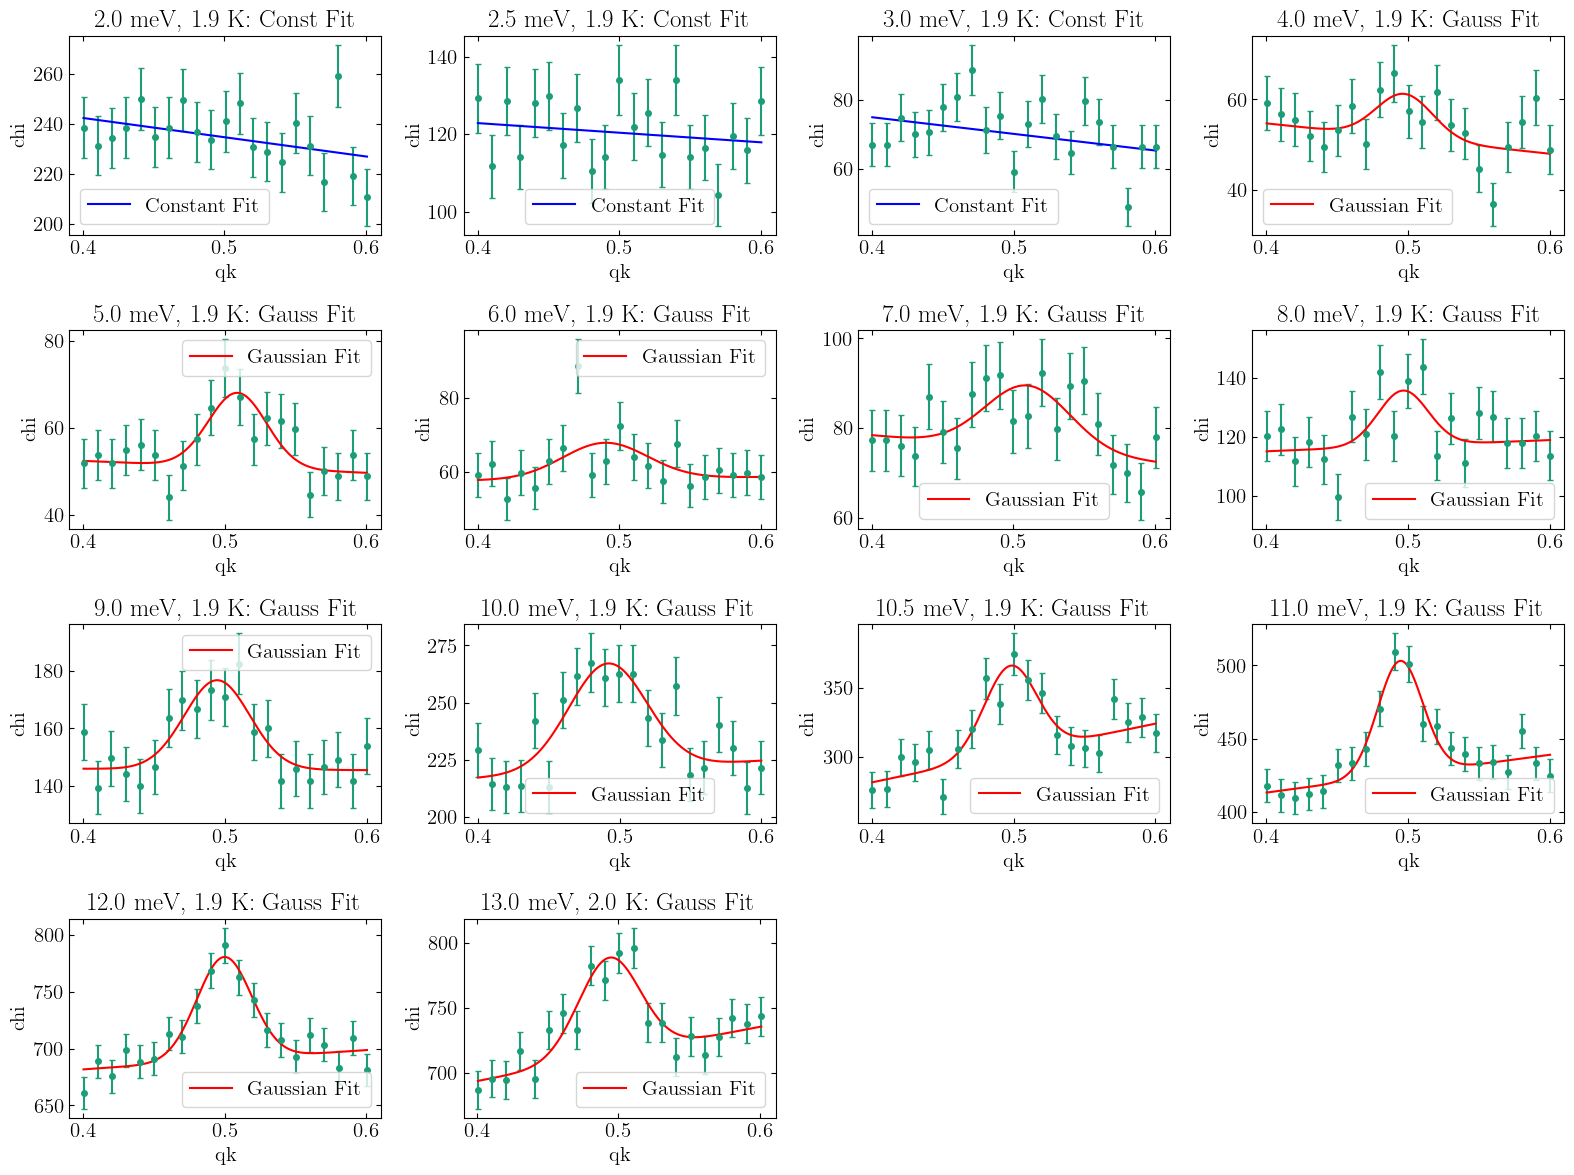

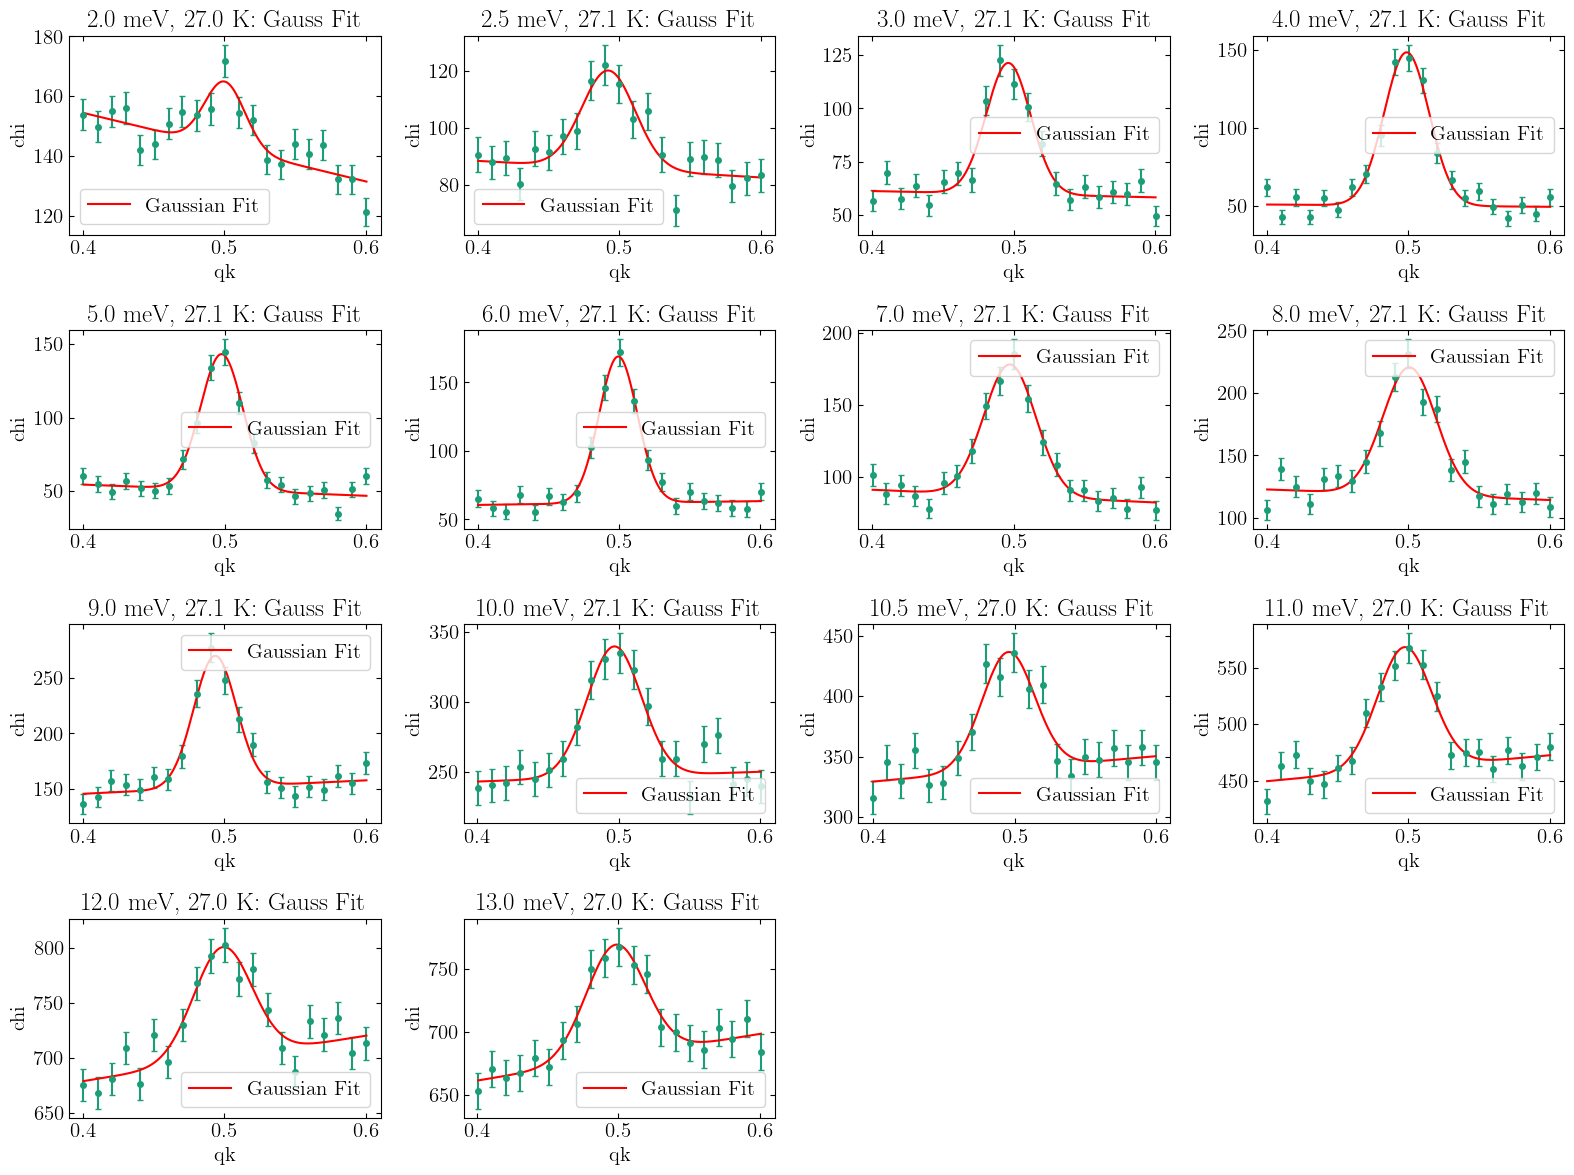

In [30]:
#def gauss_const(x, A, mu, sigma, a, C):
#    return (A / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) + a*x+ C

def gauss_const(x, A, mu, sigma, a, C):
    return A * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) + a*x+ C

# Constant model only
def model_const(x, a, C):
    return a*x+C


############################# Energy scan at 2 K #############################

gauss_geuss = {'A': 3, 'mu':0.5, 'sigma':0.02, 'a': 0.001,'C':100}
gauss_limits = {'A': (0.5, None), 'mu':(0.49, 0.51), 'sigma':(0.01,0.03)}


C_geuss = {'a': 0.001 ,'C':100}

for i in ag_q_2K:
    i.fq=fq_NCCO
    i.res_vol = NkfR0_ag
    i.calc_I()
    i.calc_SQ()
    i.calc_Chi()
    i.FindBestFit(model1=gauss_const,  model2=model_const, initial_guess1=gauss_geuss, initial_guess2=C_geuss, limits1=gauss_limits)
    print(i.best_fit_obj.hesse())

plot_fits(ag_q_2K)

############################# Energy scan at 27 K #############################


for i in ag_q_27K:
    i.fq=fq_NCCO
    i.res_vol = NkfR0_ag
    i.calc_I()
    i.calc_SQ()
    i.calc_Chi()
    i.FindBestFit(model1=gauss_const,  model2=model_const, initial_guess1=gauss_geuss, initial_guess2=C_geuss, limits1=gauss_limits)

plot_fits(ag_q_27K)

############################# Temperature scan at 2 meV #############################

for i in ag_q_2mev:
    i.fq=fq_NCCO
    i.res_vol = NkfR0_ag
    i.calc_I()
    i.calc_SQ()
    i.calc_Chi()
    i.FindBestFit(model1=gauss_const,  model2=model_const, initial_guess1=gauss_geuss, initial_guess2=C_geuss, limits1=gauss_limits)

############################# Temperature scan at 8 meV #############################

for i in ag_q_8mev:
    i.fq=fq_NCCO
    i.res_vol = NkfR0_ag
    i.calc_I()
    i.calc_SQ()
    i.calc_Chi()
    i.FindBestFit(model1=gauss_const,  model2=model_const, initial_guess1=gauss_geuss, initial_guess2=C_geuss, limits1=gauss_limits)
    

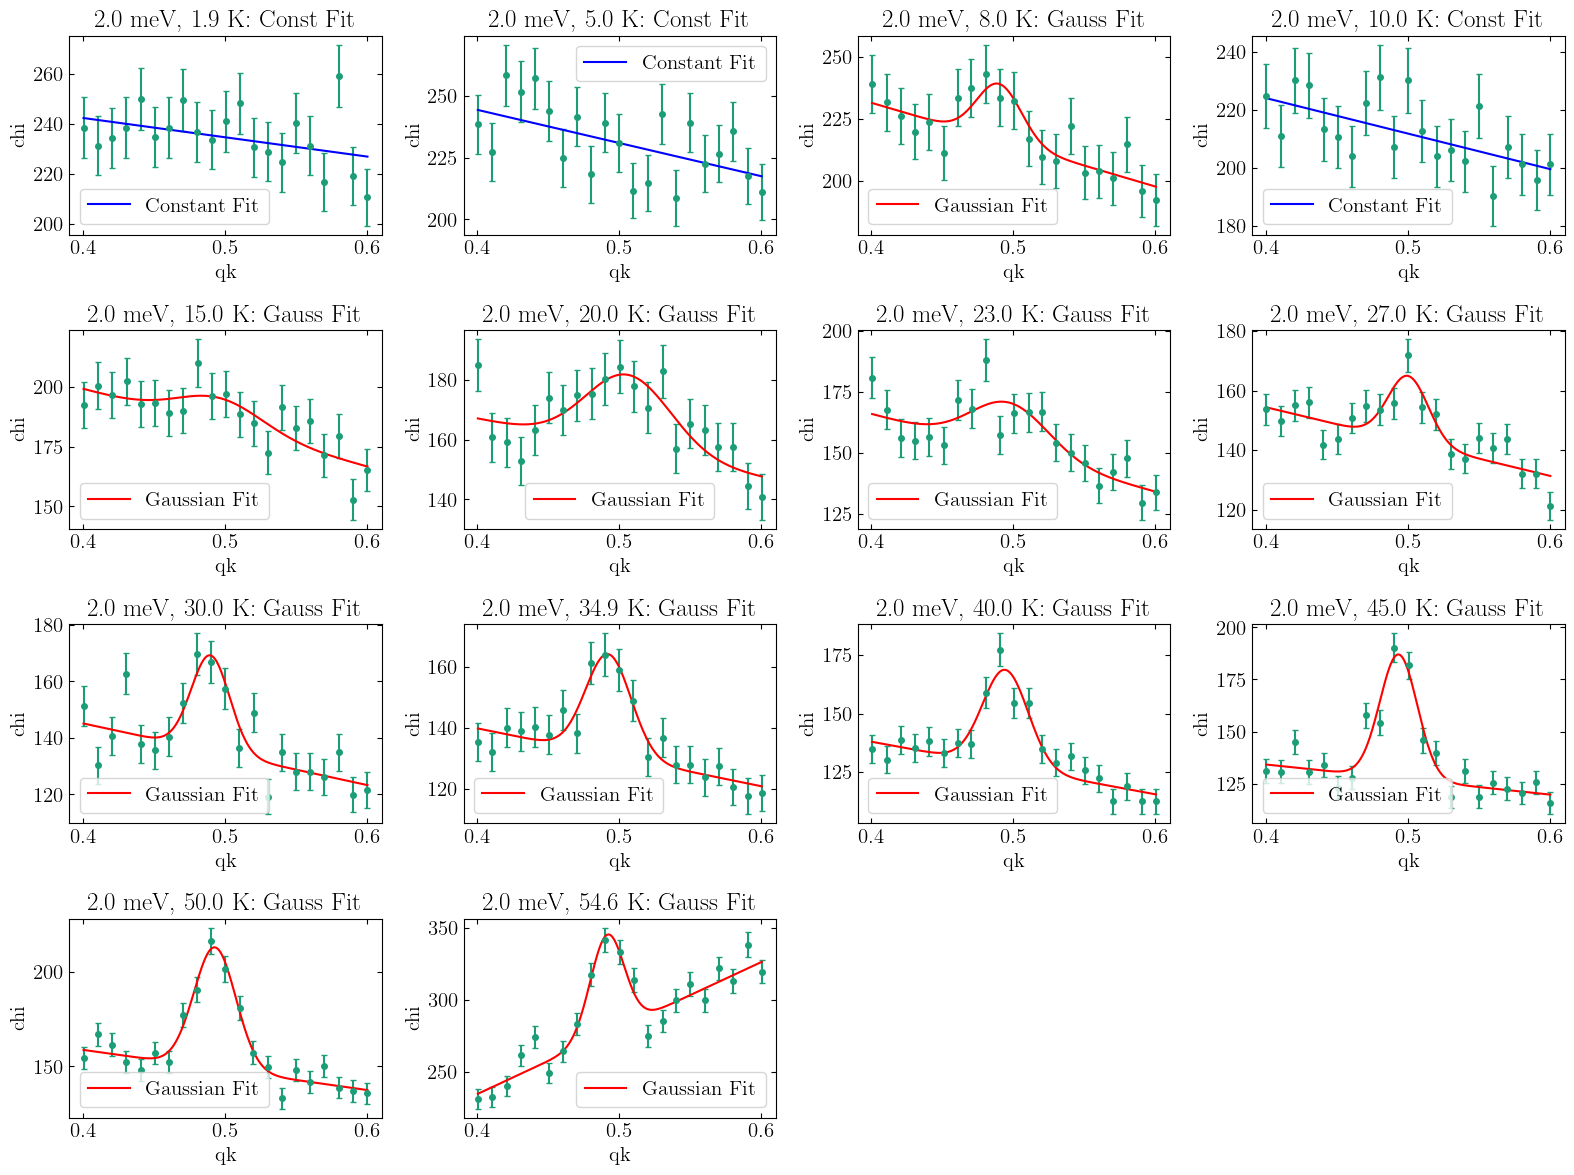

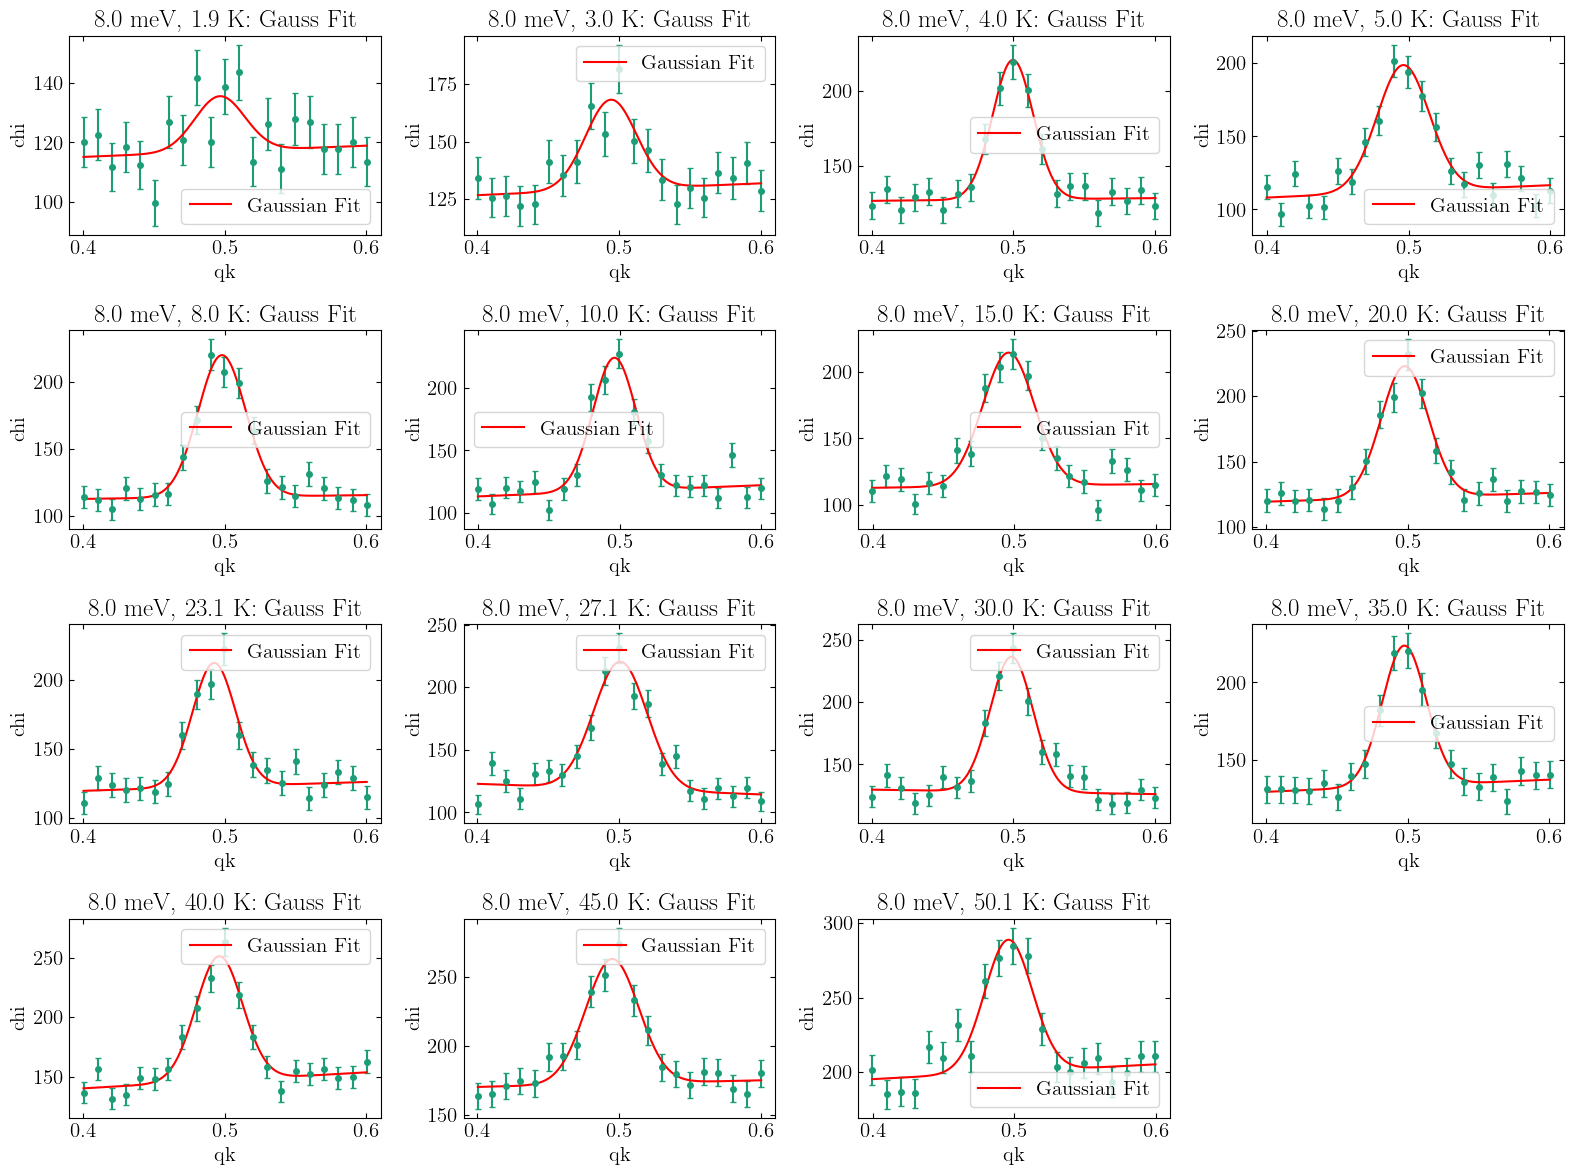

In [31]:
plot_fits(ag_q_2mev)

plot_fits(ag_q_8mev)

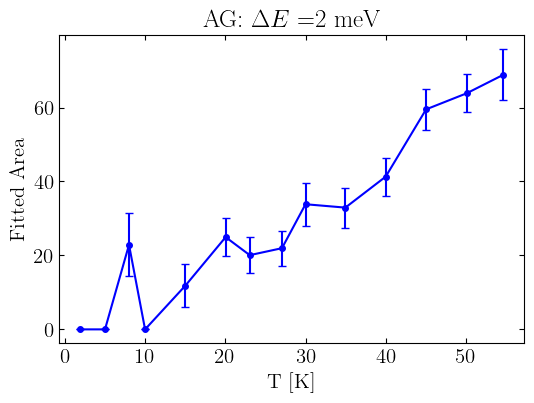

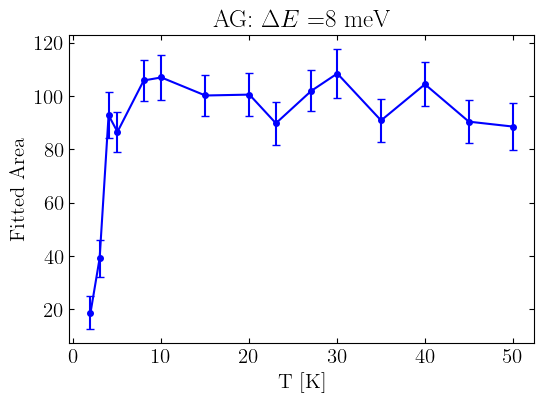

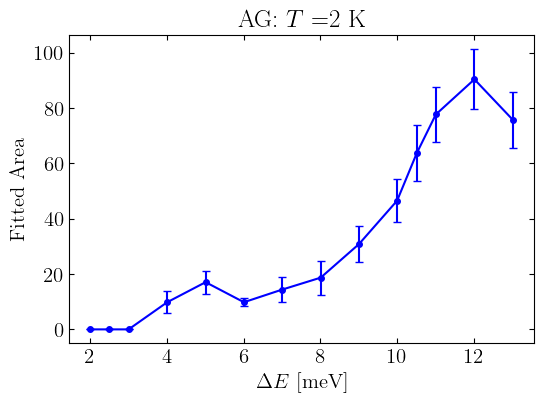

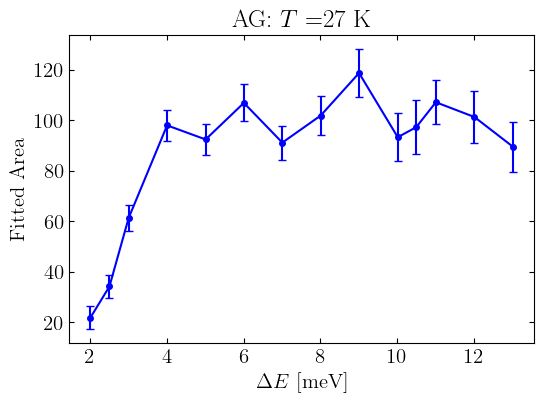

In [32]:
area_ag_2mev, area_err_ag_2mev  = PlotGaussArea(ag_q_2mev, x_attr='TT', title='AG: $\Delta E =$2 meV')

area_ag_8mev, area_err_ag_8mev  = PlotGaussArea(ag_q_8mev, x_attr='TT', title='AG: $\Delta E =$8 meV')

area_ag_2K, area_err_ag_2K = PlotGaussArea(ag_q_2K, x_attr='EN', title='AG: $T =$2 K')

area_ag_27K, area_err_ag_27K   = PlotGaussArea(ag_q_27K, x_attr='EN', title='AG: $T =$27 K')

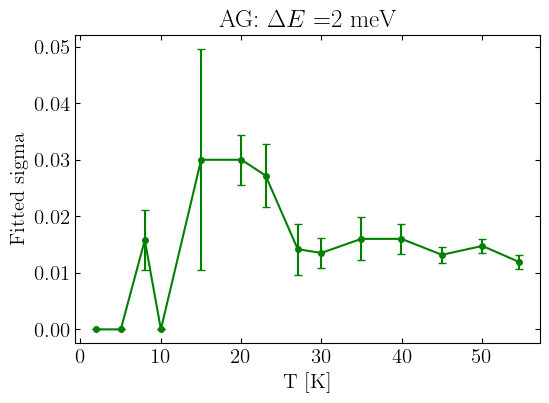

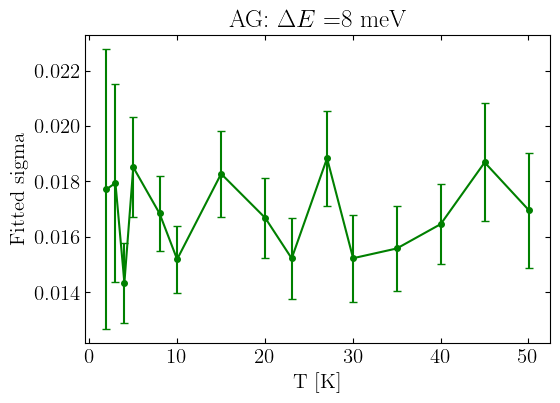

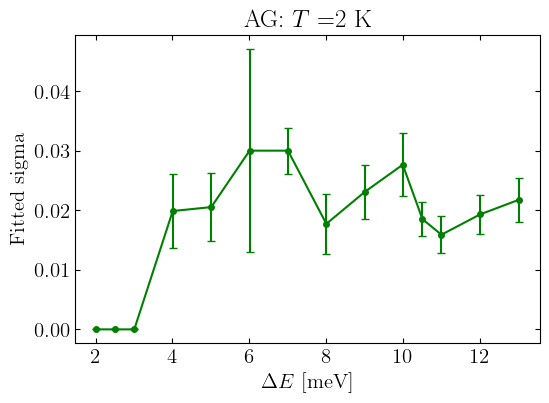

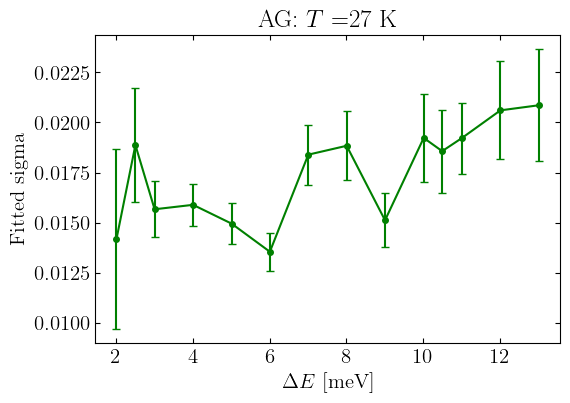

In [33]:
sigma_ag_2mev, sigma_err_ag_2mev  = PlotGaussSigma(ag_q_2mev, x_attr='TT', title='AG: $\Delta E =$2 meV')

sigma_ag_8mev, sigma_err_ag_8mev  = PlotGaussSigma(ag_q_8mev, x_attr='TT', title='AG: $\Delta E =$8 meV')

sigma_ag_2K, sigma_err_ag_2K = PlotGaussSigma(ag_q_2K, x_attr='EN', title='AG: $T =$2 K')

sigma_ag_27K, sigma_err_ag_27K   = PlotGaussSigma(ag_q_27K, x_attr='EN', title='AG: $T =$27 K')

### What is the average sigma across all q-scans in AG

In [34]:
all_sigmas_ag = sigma_ag_2K + sigma_ag_27K + sigma_ag_2mev + sigma_ag_8mev
all_sigma_errs_ag = sigma_err_ag_2K + sigma_err_ag_27K + sigma_err_ag_2mev + sigma_err_ag_8mev

sigmas = []
sigma_errs = []

for i in range(len(all_sigmas_ag)):
    if all_sigmas_ag[i] != 0:
        sigmas.append(all_sigmas_ag[i])
        sigma_errs.append(all_sigma_errs_ag[i])
    else:
        a=0

mean_sigmas = np.mean(np.asarray(sigmas))
mean_sigma_errs = np.mean(np.asarray(sigma_errs))

print(mean_sigmas)
print(mean_sigma_errs)


0.01849600217484618
0.003330498161067962


In [35]:
sc_p3_area_27K, sc_p3_area_err_27K = PointAmpToArea(sc_p3_scans_27K, mean_sigmas, mean_sigma_errs)

sc_p3_area_2K, sc_p3_area_err_2K = PointAmpToArea(sc_p3_scans_2K, mean_sigmas, mean_sigma_errs) 

sc_p3_area_2meV, sc_p3_area_err_2meV = PointAmpToArea(sc_p3_scans_2meV, mean_sigmas, mean_sigma_errs)

sc_p3_area_8meV, sc_p3_area_err_8meV = PointAmpToArea(sc_p3_scans_8meV, mean_sigmas, mean_sigma_errs)


# Article plots

## Raw Q_scans

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


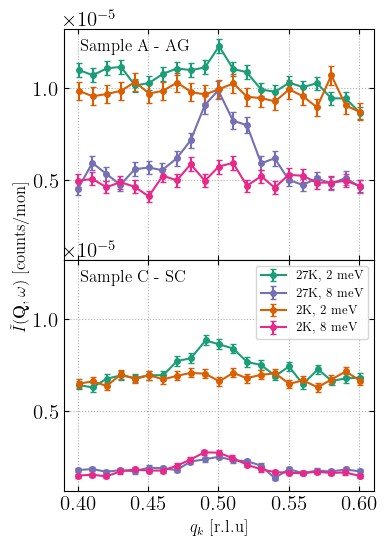

In [36]:
fig, ax = plt.subplots(2,1,figsize=(4,6), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0)

#27 K
ax[0].errorbar(ag_q_27K_2mev.QK, ag_q_27K_2mev.I, capsize = 2, yerr = ag_q_27K_2mev.I_err, fmt = 'o-', label = '27 K, 2 meV')
ax[0].errorbar(ag_q_27K_8mev.QK, ag_q_27K_8mev.I, capsize = 2, yerr = ag_q_27K_8mev.I_err, fmt = 'o-', label = '27 K, 8 meV')
# 2 K
ax[0].errorbar(ag_q_2K_2mev.QK, ag_q_2K_2mev.I, capsize = 2, yerr = ag_q_2K_2mev.I_err, fmt = 'o-', label = '2K, 2 meV')
ax[0].errorbar(ag_q_2K_8mev.QK, ag_q_2K_8mev.I, capsize = 2, yerr = ag_q_2K_8mev.I_err, fmt = 'o-', label = '2K, 8 meV')
# ax[0].set_yticks([0, 50, 100, 150, 200, 250])

ax[0].grid(linestyle='dotted')

#27 K
ax[1].errorbar(sc_q_27K_2mev.QK, sc_q_27K_2mev.I, capsize = 2, yerr = sc_q_27K_2mev.I_err, fmt = 'o-', label = '27K, 2 meV')
ax[1].errorbar(sc_q_27K_8mev.QK, sc_q_27K_8mev.I, capsize = 2, yerr = sc_q_27K_8mev.I_err, fmt = 'o-', label = '27K, 8 meV')
#2 K
ax[1].errorbar(sc_q_2K_2mev.QK, sc_q_2K_2mev.I, capsize = 2, yerr = sc_q_2K_2mev.I_err, fmt = 'o-', label = '2K, 2 meV')
ax[1].errorbar(sc_q_2K_8mev.QK, sc_q_2K_8mev.I, capsize = 2, yerr = sc_q_2K_8mev.I_err, fmt = 'o-', label = '2K, 8 meV')

ax[1].set_xlabel('$q_k$ [r.l.u]', fontsize=12)
#ax[1].set_yticks([0, 50, 100, 150, 200])
ax[1].set_xticks([0.4, 0.45, 0.5, 0.55, 0.6])
ax[1].grid(linestyle='dotted')
fig.text(0.05, 1.95, 'Sample A - AG', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
fig.text(0.05, 0.95, 'Sample C - SC', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
ax[1].legend(fontsize=9)

#plt.xlim(0.4,0.6)
fig.text(-0.01, 0.5, '$\Tilde{I}(\mathbf{Q},\omega)$ [counts/mon]', va='center', rotation='vertical', fontsize=12)
plt.savefig('Raw_scans.eps', format='eps',bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


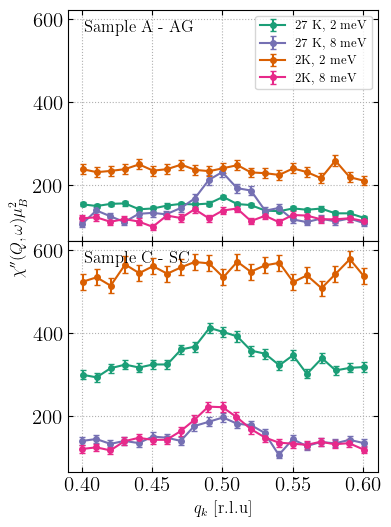

In [37]:
fig, ax = plt.subplots(2,1,figsize=(4,6), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0)

#27 K
ax[0].errorbar(ag_q_27K_2mev.QK, ag_q_27K_2mev.Chi, capsize = 2, yerr = ag_q_27K_2mev.Chi_err, fmt = 'o-', label = '27 K, 2 meV')
ax[0].errorbar(ag_q_27K_8mev.QK, ag_q_27K_8mev.Chi, capsize = 2, yerr = ag_q_27K_8mev.Chi_err, fmt = 'o-', label = '27 K, 8 meV')
# 2 K
ax[0].errorbar(ag_q_2K_2mev.QK, ag_q_2K_2mev.Chi, capsize = 2, yerr = ag_q_2K_2mev.Chi_err, fmt = 'o-', label = '2K, 2 meV')
ax[0].errorbar(ag_q_2K_8mev.QK, ag_q_2K_8mev.Chi, capsize = 2, yerr = ag_q_2K_8mev.Chi_err, fmt = 'o-', label = '2K, 8 meV')
# ax[0].set_yticks([0, 50, 100, 150, 200, 250])
ax[0].legend(fontsize=9)
ax[0].grid(linestyle='dotted')


#27 K
ax[1].errorbar(sc_q_27K_2mev.QK, sc_q_27K_2mev.Chi, capsize = 2, yerr = sc_q_27K_2mev.Chi_err, fmt = 'o-', label = '27K, 2 meV')
ax[1].errorbar(sc_q_27K_8mev.QK, sc_q_27K_8mev.Chi, capsize = 2, yerr = sc_q_27K_8mev.Chi_err, fmt = 'o-', label = '27K, 8 meV')
#2 K
ax[1].errorbar(sc_q_2K_2mev.QK, sc_q_2K_2mev.Chi, capsize = 2, yerr = sc_q_2K_2mev.Chi_err, fmt = 'o-', label = '2K, 2 meV')
ax[1].errorbar(sc_q_2K_8mev.QK, sc_q_2K_8mev.Chi, capsize = 2, yerr = sc_q_2K_8mev.Chi_err, fmt = 'o-', label = '2K, 8 meV')

ax[1].set_xlabel('$q_k$ [r.l.u]', fontsize=12)
#ax[1].set_yticks([0, 50, 100, 150, 200])
ax[1].set_xticks([0.4, 0.45, 0.5, 0.55, 0.6])
ax[1].grid(linestyle='dotted')
fig.text(0.05, 1.95, 'Sample A - AG', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
fig.text(0.05, 0.95, 'Sample C - SC', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')


#plt.xlim(0.4,0.6)
fig.text(-0.02, 0.5, '$\chi \'\' (Q, \omega) \mu_B^2 $', va='center', rotation='vertical', fontsize=12)
plt.savefig('Raw_scans.eps', format='eps',bbox_inches='tight')

## Energy and temperature dependence

### Extract object info - SC

In [38]:
amp_sc_p3_27K = [obj.amp for obj in sc_p3_scans_27K]
amp_err_sc_p3_27K = [obj.amp_err for obj in sc_p3_scans_27K]
EN_sc_p3_27K = [obj.EN for obj in sc_p3_scans_27K]

amp_sc_p3_2K = [obj.amp for obj in sc_p3_scans_2K]
amp_err_sc_p3_2K = [obj.amp_err for obj in sc_p3_scans_2K]
EN_sc_p3_2K = [obj.EN for obj in sc_p3_scans_2K]

amp_sc_p3_2mev = [obj.amp for obj in sc_p3_scans_2meV]
amp_err_sc_p3_2mev = [obj.amp_err for obj in sc_p3_scans_2meV]
TT_sc_p3_2mev = [obj.TT for obj in sc_p3_scans_2meV]

amp_sc_p3_8mev = [obj.amp for obj in sc_p3_scans_8meV]
amp_err_sc_p3_8mev = [obj.amp_err for obj in sc_p3_scans_8meV]
TT_sc_p3_8mev = [obj.TT for obj in sc_p3_scans_8meV]




### Extract object info - AG

In [39]:
A_ag_27K = area_ag_27K
A_err_ag_27K =  area_err_ag_27K
EN_ag_27K = [obj.EN for obj in ag_q_27K]

A_ag_2K =  area_ag_2K
A_err_ag_2K = area_err_ag_2K
EN_ag_2K = [obj.EN for obj in ag_q_2K]

A_ag_2mev = area_ag_2mev
A_err_ag_2mev = area_err_ag_2mev
TT_ag_2mev = [obj.TT for obj in ag_q_2mev]

A_ag_8mev = area_ag_8mev
A_err_ag_8mev = area_err_ag_8mev
TT_ag_8mev = [obj.TT for obj in ag_q_8mev]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


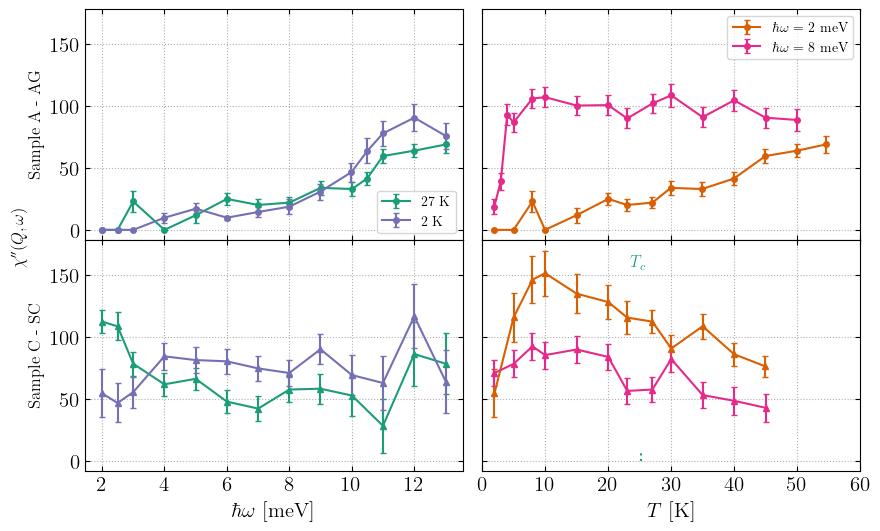

In [43]:
fig, ax = plt.subplots(2,2,figsize=(10,6), sharey=True)
fig.subplots_adjust(hspace=0, wspace=0.05)


ax[0,0].errorbar(EN_ag_27K, A_ag_27K, capsize = 2, yerr = A_err_ag_27K, fmt = '-o', label = '27 K')
ax[0,0].errorbar(EN_ag_2K, A_ag_2K, capsize = 2, yerr = A_err_ag_2K, fmt = '-o', label = '2 K')
ax[0,0].grid(linestyle='dotted')
ax[0,0].legend(fontsize=10, loc='lower right')
ax[0,0].set_xticks([2, 4, 6, 8, 10, 12])
#ax[0,0].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
#ax[0,0].set_ylim(-0.1,1.0)

ax[1,0].errorbar(EN_sc_p3_27K, amp_sc_p3_27K, capsize = 2, yerr = amp_err_sc_p3_27K, fmt = '-^', label = '27 K')
ax[1,0].errorbar(EN_sc_p3_2K, amp_sc_p3_2K, capsize = 2, yerr = amp_err_sc_p3_2K, fmt = '-^', label = '2 K')
ax[1,0].grid(linestyle='dotted')
ax[1,0].set_xticks([2, 4, 6, 8, 10, 12])
#ax[1,0].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
#ax[1,0].set_ylim(-0.1,1.6)
ax[0,0].set_xticklabels([])

ax[0,0].set_ylabel('Sample A - AG', fontsize=12)
ax[1,0].set_ylabel('Sample C - SC', fontsize=12)

ax[1,0].set_xlabel('$\hbar \omega$ [meV]')
fig.text(0.05, 0.5, '$\chi\'\'(Q, \omega)$', va='center', rotation='vertical', fontsize=12)

#############################

Tc = np.ones(1000)*25.3

ax[0,1].errorbar(TT_ag_2mev, A_ag_2mev, capsize = 2, yerr = A_err_ag_2mev, fmt = '-o', label = '$\hbar \omega =$ 2 meV', color= '#d95f02')
ax[0,1].errorbar(TT_ag_8mev, A_ag_8mev, capsize = 2, yerr = A_err_ag_8mev, fmt = '-o', label = '$\hbar \omega =$ 8 meV', color= '#e7298a')
ax[0,1].grid(linestyle='dotted')
ax[0,1].legend(fontsize=10)
#ax[0,1].set_yticks([0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75])
#ax[0,1].set_ylim(-0.1, 1.9)
ax[0,1].set_xlim(0, 60)
ax[0,1].set_xticklabels([])
ax[1,1].errorbar(TT_sc_p3_2mev, amp_sc_p3_2mev, capsize = 2, fmt ='-^', yerr = amp_err_sc_p3_2mev, label = '2 meV', color= '#d95f02')
ax[1,1].errorbar(TT_sc_p3_8mev, amp_sc_p3_8mev, capsize = 2, fmt ='-^', yerr = amp_err_sc_p3_8mev, label = '8 meV', color= '#e7298a')
ax[1,1].grid(linestyle='dotted')
ax[1,1].plot(Tc, np.linspace(0, 8, 1000),linestyle='dotted')
ax[1,1].set_xlim(0,60)
#ax[1,1].set_yticks([0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75])
#ax[1,1].set_ylim(0, 190)


ax[1,1].set_xlabel('$T$ [K]')

fig.text(0.67, 0.45, '$T_c$', fontsize=12, color='#1b9e77')

plt.savefig('E_and_T_dependence.eps', format='eps',bbox_inches='tight')

## 27 K - 2 K

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


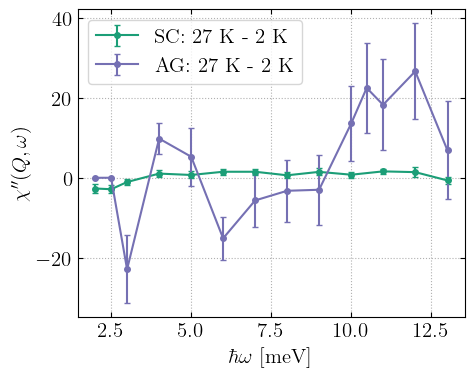

In [41]:
plt.figure(figsize=(5,4))

amp_sc_p3_TT = np.asarray(sc_p3_area_2K) - np.asarray(sc_p3_area_27K)
amp_err_sc_p3_TT = np.sqrt(np.asarray(sc_p3_area_err_27K)**2 + np.asarray(sc_p3_area_err_2K)**2)


ag_tt = np.asarray(A_ag_2K) - np.asarray(A_ag_27K)
ag_tt_err = np.sqrt(np.asarray(A_err_ag_27K)**2 + np.asarray(A_err_ag_2K)**2)

plt.errorbar(EN_sc_p3_27K, amp_sc_p3_TT, capsize = 2, fmt ='-o', yerr = amp_err_sc_p3_TT, label = 'SC: 27 K - 2 K ')
plt.errorbar(EN_ag_27K, ag_tt, capsize = 2, fmt ='-o', yerr = ag_tt_err, label = 'AG: 27 K - 2 K ')

plt.ylabel('$\chi\'\'(Q, \omega)$')
plt.xlabel('$\hbar \omega$ [meV]')
#plt.yticks([-1.25, -1.0, -0.75, -0.5, -0.25, 0, 0.25, 0.5])
#plt.ylim(-1.25,0.5)
plt.grid(linestyle='dotted')
plt.legend()

plt.savefig('T_difference.eps', format='eps',bbox_inches='tight')
